In [1]:
import numpy as np 

import xarray as xr

In [2]:
%%time
ds = xr.open_mfdataset("/project/amp/jcaron/CPC_Tminmax/tmax.*.nc")
tmax = ds['tmax']

CPU times: user 356 ms, sys: 43 ms, total: 399 ms
Wall time: 408 ms


In [3]:
sacramento = (38. + 33/60,  360. - (121. + 28/60))

In [4]:
sac_tmax = tmax.sel(lat=sacramento[0], lon=sacramento[1], method='nearest')

In [5]:
sac_tmax

<xarray.DataArray 'tmax' (time: 14736)>
dask.array<shape=(14736,), dtype=float32, chunksize=(365,)>
Coordinates:
    lat      float32 38.75
    lon      float32 238.75
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-05-06
Attributes:
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    cell_methods:  time: mean
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded using the Shepard Algorithm
    max_period:    6z to 6z
    units:         degC
    var_desc:      Maximum Temperature

In [6]:
# now get some particular day of the year:
sac_tmax['time.month' == 7]

<xarray.DataArray 'tmax' ()>
dask.array<shape=(), dtype=float32, chunksize=()>
Coordinates:
    lat      float32 38.75
    lon      float32 238.75
    time     datetime64[ns] 1979-01-01
Attributes:
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    cell_methods:  time: mean
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded using the Shepard Algorithm
    max_period:    6z to 6z
    units:         degC
    var_desc:      Maximum Temperature

# Selecting a particular date
The following is one example of how to select a particular date. 

When we load the dataset, Xarray decodes the time coordinate into an array of datetime objects. The nice thing about them is that they can be accessed in ways that allow the specification of parts of the date.

In the following cell, we will use the `dt` accessor to get the indices that are in july (month value equal 7) and with a day (i.e. day of month) equal to 4. 

Note that `time.dt.month ==7` returns an array of True/False values that is True for all data identified as being in July. Then we use the `&` to combine that array with the True/False array that checks for the day of the month being 4. 

In [7]:
time = ds['time']
independence_day = sac_tmax[(time.dt.month == 7) & (time.dt.day == 4)]

In [8]:
time.dt.day[0:366]

<xarray.DataArray 'day' (time: 366)>
array([ 1,  2,  3, ..., 30, 31,  1])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1980-01-01

# Quick look plots

Xarray has some simple plotting functionality. We can use that here to get a quck look at the resulting series of 4 July Tmax values in Sacramento.

_NOTE:_ We really should not rely on Xarray's plots for very much because it becomes hard to customize them.

In [9]:
%matplotlib inline

/project/amp/brianpm/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


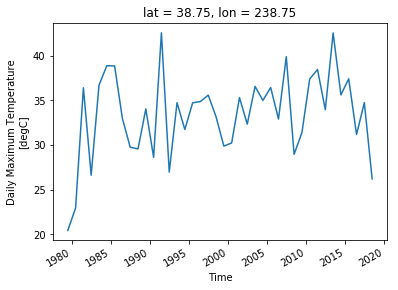

In [10]:
independence_day.plot()

In [21]:
np.histogram(independence_day)

(array([ 1,  1,  3,  2,  6,  5, 10,  6,  4,  2]),
 array([20.43872 , 22.648785, 24.858849, 27.068914, 29.278978, 31.489042,
        33.69911 , 35.909172, 38.119236, 40.3293  , 42.539364],
       dtype=float32))

In [17]:
import matplotlib.pyplot as plt

In [14]:
independence_day.min().values

array(20.43872, dtype=float32)

In [15]:
independence_day.load()

<xarray.DataArray 'tmax' (time: 40)>
array([20.43872 , 22.9501  , 36.398506, 26.625046, 36.67902 , 38.858513,
       38.83661 , 32.96402 , 29.751451, 29.560041, 34.03031 , 28.619316,
       42.539364, 26.962753, 34.7282  , 31.726683, 34.71311 , 34.862328,
       35.575138, 33.15336 , 29.874626, 30.226507, 35.298985, 32.336784,
       36.55246 , 34.984577, 36.420593, 32.90054 , 39.877167, 28.960207,
       31.367868, 37.378284, 38.440315, 33.94316 , 42.525158, 35.599594,
       37.400303, 31.17207 , 34.73664 , 26.212353], dtype=float32)
Coordinates:
    lat      float32 38.75
    lon      float32 238.75
  * time     (time) datetime64[ns] 1979-07-04 1980-07-04 ... 2018-07-04
Attributes:
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    cell_methods:  time: mean
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded 

(array([ 1.,  1.,  3.,  2.,  6.,  5., 10.,  6.,  4.,  2.]),
 array([20.43872 , 22.648785, 24.858849, 27.068914, 29.278978, 31.489042,
        33.69911 , 35.909172, 38.119236, 40.3293  , 42.539364],
       dtype=float32),
 <a list of 10 Patch objects>)

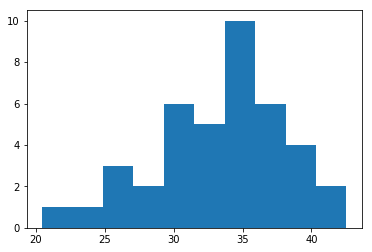

In [18]:
plt.hist(independence_day, bins=10)

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 2., 0., 0., 1., 1., 2.,
        2., 0., 2., 1., 1., 2., 1., 2., 3., 3., 2., 2., 2., 2., 0., 1., 2.,
        0., 1., 0., 0., 0., 2.]),
 array([20.43872 , 20.991238, 21.543753, 22.09627 , 22.648785, 23.201302,
        23.753817, 24.306334, 24.858849, 25.411366, 25.963882, 26.516397,
        27.068914, 27.62143 , 28.173946, 28.726461, 29.278978, 29.831493,
        30.38401 , 30.936525, 31.489042, 32.041557, 32.594074, 33.14659 ,
        33.69911 , 34.25162 , 34.80414 , 35.356655, 35.909172, 36.461685,
        37.014202, 37.56672 , 38.119236, 38.671753, 39.224266, 39.776783,
        40.3293  , 40.881817, 41.43433 , 41.986847, 42.539364],
       dtype=float32),
 <a list of 40 Patch objects>)

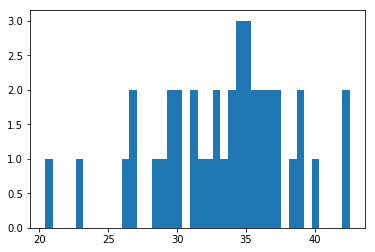

In [19]:
plt.hist(independence_day, bins=40)

# Simple function
Just as a reminder, you can make reusable code by defining a function. Here is a function that is called `degC_to_degF` that takes temperature in Celsius and converts it to Fahrenheit. 

Then we use that function to really drive home the point that Sacramento is super hot.

In [30]:
def degC_to_degF(C):
    return C * (9./5.) + 32.

In [31]:
in_f = degC_to_degF(independence_day)

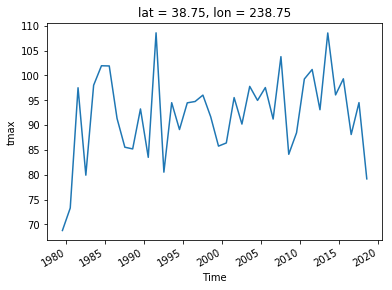

In [32]:
in_f.plot()